# DSM_0508
## 主題: 機器學習(2) - 迴歸、SVM、決策樹
### 專案目標: 
- 了解迴歸、SVM、決策樹的概念與應用
- 實作迴歸、SVM、決策樹的模型

Host: Isaac

Time: 2025/05/08

參考書目: 精通機器學習｜使用 Scikit-Learn , Keras 與 TensorFlow, 2/e


關鍵字:`線性回歸`、 `羅吉斯回歸` 、 `多項式羅吉斯回歸` 、 `L1正規化` 、`L2正規化` 、 `SVM` 、 `決策樹`



# 1. 迴歸（Regression）

## 1.1 訓練線性回歸（Linear Regression）模型主要方法


- **第一種方法：Closed-form（封閉解法）** (用數學公式直接解出來)

這種方法是透過數學公式，**一次性計算出最佳的模型參數**，也就是讓訓練資料的誤差（成本函數）最小的那一組參數。這種方式不需要反覆試誤，效率高，但在資料量很大的時候會比較吃力。

- **第二種方法：Gradient Descent（梯度下降法）** (用優化演算法慢慢找)

    這是一種**迭代式的最佳化方法**。它會根據目前模型在訓練資料上的誤差，逐步調整模型的參數，慢慢讓模型的誤差降低，最終達到和第一種方法相同的結果。

    * 批次梯度下降（Batch GD）
    * 小批次梯度下降（Mini-batch GD）
    * 隨機梯度下降（Stochastic GD）




## 1.2 線性回歸是什麼？

線性回歸是一種**用直線預測數字的方法**。舉個例子：

假設你想根據一個人的 **收入（x）** 來預測他的 **生活滿意度（y）**。

你可以畫一條直線，試著讓它**盡量貼近這些人的資料點**，這條直線的公式可能長這樣：

$$
y = \theta_0 + \theta_1 \cdot x
$$

其中：

* $y$：你想預測的數值（例如生活滿意度）
* $x$：輸入的特徵（例如收入）
* $\theta_0$：直線的截距（bias，當 $x=0$ 時 $y$ 是多少）
* $\theta_1$：直線的斜率（也就是 $x$ 每多 1，$y$ 增加多少）

這就是一元一次方程式，對吧？這就是最簡單的線性回歸。

### 1.2.1 如果有很多變數呢？

如果你不只考慮收入，還考慮年齡、工作時數、學歷等因素，那就會變成這樣的公式：

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

這時候我們就會用**向量**來簡寫：

* 把所有的輸入特徵放進一個向量 $\mathbf{x}$：

  $$
  \mathbf{x} = \begin{bmatrix}1 \\ x_1 \\ x_2 \\ \vdots \\ x_n\end{bmatrix}
  $$

  （第一個 1 是為了對應 $\theta_0$）

* 把所有參數放進另一個向量 $\boldsymbol{\theta}$：

  $$
  \boldsymbol{\theta} = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n\end{bmatrix}
  $$

這時候模型就可以簡寫成：

$$
\hat{y} = \boldsymbol{\theta}^T \cdot \mathbf{x}
$$

這就是「向量內積」


### 1.2.2 我們的目標：找出「最好的那一組 $\boldsymbol{\theta}$」

有了模型後，真正的問題是：

`怎麼知道哪條線最能貼近資料？`

我們會定義一個「誤差公式」來衡量模型預測得好不好。最常用的誤差叫做：

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

意思是：把每個預測值與實際值的差距平方後，加總平均。

接下來我們就要想辦法「**最小化這個誤差**」，找出一組 $\boldsymbol{\theta}$ 讓這個誤差最低。


### 1.2.3 怎麼找出最佳參數？

有兩種方式可以做到這件事：

1. **用數學公式直接解（closed-form）**：
   適合資料量小，可以直接解出 $\boldsymbol{\theta}$。

2. **用反覆調整的方式（梯度下降 Gradient Descent）**：
   像是在山谷中走來走去，找到最深的地方（最小誤差）。這種方式適合資料量大、變數多。

## 小結

* 線性回歸就是畫一條線來預測數字。
* 當變數多時，我們會用向量來表示輸入與參數。
* 我們的目標是找到那條最貼近資料的線，也就是最小化誤差。
* 可以用數學解法或優化演算法來做到這件事。


## 1.3 正規方程式（Normal Equation）求解線性回歸模型的最佳參數 $\theta$

### 1.3.1 問題設定

你有一堆資料，每筆資料長這樣：

$$
\mathbf{x}^{(i)} = [1, x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)}]
\quad \text{對應的標籤是} \quad y^{(i)}
$$

總共有 $m$ 筆資料，每筆有 $n$ 個特徵（不含常數項）。

我們想要找出參數向量 $\boldsymbol{\theta}$，讓預測值：

$$
\hat{y}^{(i)} = \boldsymbol{\theta}^T \mathbf{x}^{(i)}
$$

**盡可能貼近真實的 $y^{(i)}$**。


### 1.3.2 矩陣形式

把所有訓練資料組成一個矩陣：

$$
X =
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}
\quad \text{（尺寸：} m \times (n+1)\text{）}
$$

對應的真實標籤放成向量：

$$
\mathbf{y} =
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix}
\quad \text{（尺寸：} m \times 1\text{）}
$$

### 1.3.3 MSE 損失函數（用矩陣表示）

我們要最小化：

$$
MSE(\boldsymbol{\theta}) = \frac{1}{m} \| X \boldsymbol{\theta} - \mathbf{y} \|^2
$$

這裡的意思是「模型預測值 $X \boldsymbol{\theta}$ 跟真實值 $\mathbf{y}$ 差多少」。

### 1.3.4 正規方程式（Normal Equation）

你可以透過計算導數並令其為 0，推導出最佳的 $\boldsymbol{\theta}$ 應滿足以下公式：

$$
\boldsymbol{\theta} = (X^T X)^{-1} X^T \mathbf{y}
$$

這就是**正規方程式**，也稱為**解析解（closed-form solution）**。

### 1.3.5使用方式與注意事項

1. 優點：

   * 一次性直接算出來，**不需要反覆更新參數**。
   * 效率高、準確度佳（適合變數不多、資料不大時）。

2. 缺點：

   * $X^T X$ 的反矩陣（inverse）可能不存在或難以計算。
   * 若特徵很多或資料筆數很大，計算複雜度高（尤其是反矩陣計算）。

### 1.3.6 簡單數值範例（2 筆資料、1 個特徵）

假設我們有：

$$
X =
\begin{bmatrix}
1 & 1 \\
1 & 2
\end{bmatrix}
,\quad
\mathbf{y} =
\begin{bmatrix}
2 \\
3
\end{bmatrix}
$$

那就代入公式：

1. $X^T X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}^T \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix} = \begin{bmatrix} 2 & 3 \\ 3 & 5 \end{bmatrix}$

2. $X^T y = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}^T \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 5 \\ 8 \end{bmatrix}$

3. 最後計算：

$$
\boldsymbol{\theta} = (X^T X)^{-1} X^T y = \begin{bmatrix} 2 & 3 \\ 3 & 5 \end{bmatrix}^{-1} \begin{bmatrix} 5 \\ 8 \end{bmatrix}
$$

這樣就可以算出最好的參數 $\boldsymbol{\theta}$。



---

## 1.4 線性回歸的封閉解法實作
我們先生出一個簡單的範例資料

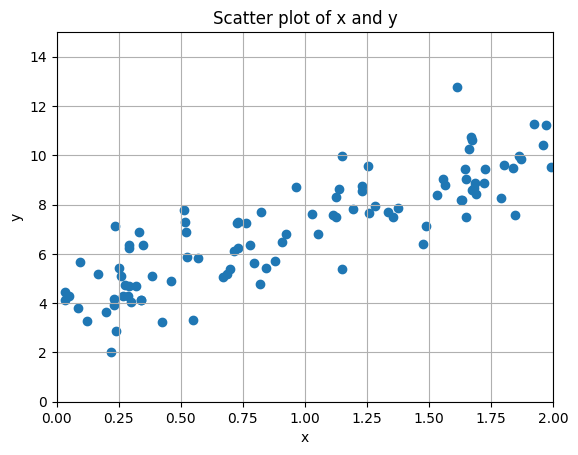

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of x and y")
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

接著用正規方程式來計算線性回歸的參數 $\theta$，使用 `numpy` 的 `lstnalg` 模組來計算矩陣的反矩陣，並且使用 `numpy` 的 `dot` 函數來計算矩陣的乘法。



In [2]:
x_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

print("Theta best:", theta_best)

Theta best: [[3.95986392]
 [3.11940525]]


In [5]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.95986392],
       [10.19867443]])

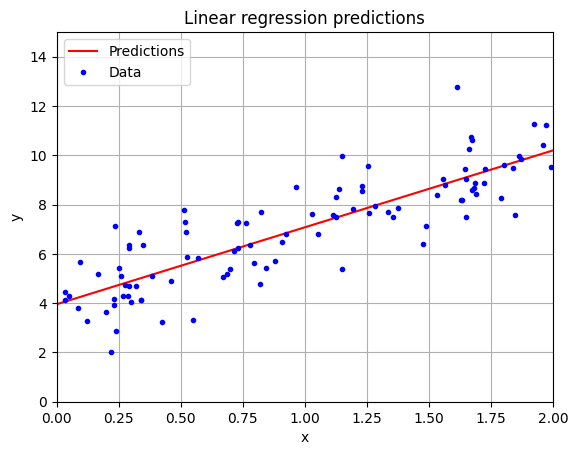

In [9]:
plt.plot(x_new, y_predict, "r-", label="Predictions")
plt.plot(x, y, "b.", label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression predictions")
plt.axis([0, 2, 0, 15])
plt.grid(True)
#調整圖例位置
plt.legend(loc="upper left")
plt.show()

用scikit-learn的`LinearRegression`來計算線性回歸的參數 $\theta$

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(x_new)

array([[ 3.95986392],
       [10.19867443]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[3.95986392],
       [3.11940525]])

## 1.5 線性回歸中使用梯度下降法

梯度下降法（Gradient Descent）是一種優化演算法，用來尋找函數的最小值。它的基本原理是：從一個初始點開始，計算該點的梯度（即函數在該點的斜率），然後沿著梯度的反方向移動一小步，重複這個過程直到找到函數的最小值。

有幾種不同的梯度下降法，主要區別在於每次更新參數時使用的資料量：

### 1.5.1  批次梯度下降（Batch Gradient Descent）

想像你要把一張大地圖上的山谷找出來（最低點），你現在站在某個地方，手上有全部的地形資料，你看完整張地圖後，決定往哪個方向走，然後再移動一步。

* 每次都**看完整張地圖**才走一步。
* 所以方向很準，走得很穩。
* 但每次出發前都要花很久看整張地圖，很慢。

適合資料不多、你不趕時間的情況。

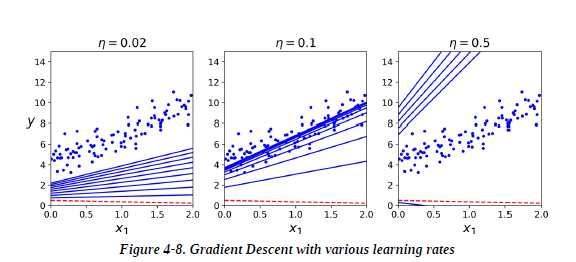

### 1.5.2 隨機梯度下降（Stochastic Gradient Descent, SGD）

這次你沒有整張地圖，只有每次能看一個地點。

你走一步之後，就用你那一格的地形判斷接下來往哪裡走。

* 每次**只看一小格**地圖就走。
* 好處是速度超快、隨走隨改。
* 壞處是容易亂走、路徑會抖來抖去。

適合資料超多的情況，也適合「即時更新」（像即時推薦系統）。

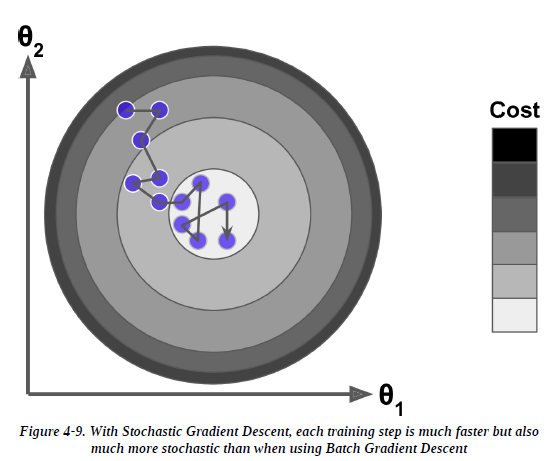

### 1.5.3 小批次梯度下降（Mini-batch GD）

這是前兩者的折衷版本。

你每次看**一小塊地圖（小批次）**，然後決定方向走一步。

* 看得不多不少，比較省時間。
* 比起一筆一筆算，走得比較穩。
* 比起整張地圖看，省記憶體又夠準。

這是現在**訓練 AI 模型最常用的方法**。



### 1.5.4 奇異值分解（SVD）

SVD 不像前面三個「一步步走」，它比較像：

你直接找出一個超級數學公式，**一次性就計算出最佳答案**，好像你一開始就知道山谷在哪裡。

* 不用走路（不用迭代），直接計算出結果。
* 非常精準，但需要複雜計算、佔用很多記憶體。
* 適合小型問題（資料不多）或要做理論分析時。

### 小結

| 方法         | 地圖範圍      | 速度   | 穩定性 | 適合什麼人                 |
| ---------- | --------- | ---- | --- | --------------------- |
| BGD        | 每次看整張地圖   | 慢    | 很穩  | 資料少、想精準慢慢來的人          |
| SGD        | 每次看一格地圖   | 非常快  | 抖動多 | 資料超大、想即時學習的人          |
| Mini-batch | 每次看一小塊地圖  | 適中   | 穩定  | 現代 AI 模型最常見方式         |
| SVD        | 不走路、直接算答案 | 不需要走 | 超穩  | 需要理論解、資料不多、做報告或數學分析的人 |


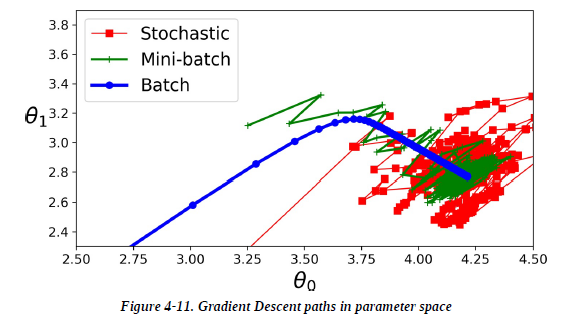

## 1.7 多項式線性回歸
多項式線性回歸（Polynomial Linear Regression）是線性回歸的一種擴展，允許我們使用多項式來擬合資料。這意味著我們可以用更複雜的曲線來描述資料，而不僅僅是直線。
這對於資料中存在非線性關係的情況特別有用。多項式線性回歸的基本思想是將輸入特徵轉換為多項式形式，然後使用線性回歸模型來擬合這些轉換後的特徵。

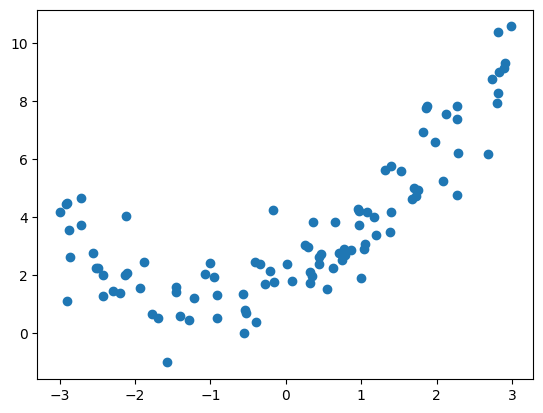

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

直線絕對沒辦法擬合資料，這時候就需要用到sklearn的`PolynomialFeatures`來將資料轉換成多項式的形式，然後再用線性回歸模型來擬合這些轉換後的特徵。


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
x[0]
X_poly[0]

array([-0.91253463,  0.83271945])

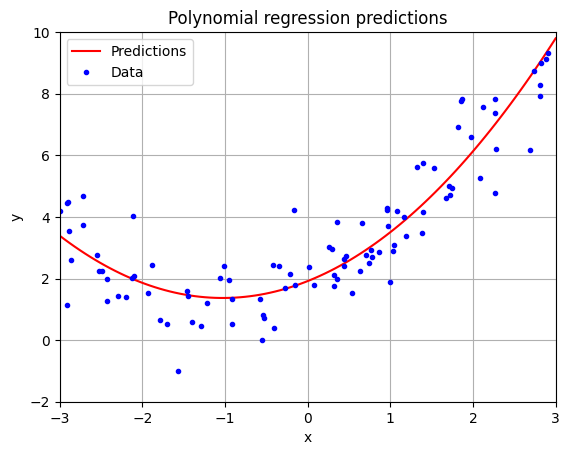

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# Plotting the model predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.plot(X, y, "b.", label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial regression predictions")
plt.axis([-3, 3, -2, 10])   
plt.grid(True)
plt.legend(loc="upper left")
plt.show()


### <span style="color: skyblue;"> 1.7.1 名詞解釋: 什麼是學習曲線？ </span>

學習曲線通常是畫出：

* **訓練誤差（Training Error）**
* **驗證誤差（Validation Error）**

這兩條線，隨著「訓練資料量」變化的趨勢。

這樣我們可以看出：

* 模型是否有學到東西（Training Error 有沒有下降）
* 學到的東西能不能用在新資料上（Validation Error 有沒有趨於穩定）


### 1.7.2 加入多項式會怎樣？

多項式迴歸中，你可以調整**階數（degree）**，這其實就是調整「模型的複雜度」。不同階數下，學習曲線會長得非常不同：


#### 1. **多項式階數太低（模型太簡單） → 欠擬合 Underfitting**

* 訓練誤差高：模型連訓練資料都學不好
* 驗證誤差也高：當然也不會泛化
* 學習曲線兩條線都很高，而且彼此靠得很近

這代表模型太「笨」，太簡單，畫不出資料的趨勢。


#### 2. **多項式階數適中 → 最佳平衡**

* 訓練誤差適中，驗證誤差最低
* 學習曲線顯示兩條線都往下，並趨於收斂

這是我們希望的狀況，模型有能力學會資料趨勢，也能泛化到新資料。


#### 3. **多項式階數太高（模型太複雜） → 過擬合 Overfitting**

* 訓練誤差非常低：模型幾乎完全記住資料
* 驗證誤差很高：泛化能力差
* 學習曲線兩條線「差距大」：訓練誤差低、驗證誤差高

這代表模型太「聰明」，連雜訊都學起來，導致新資料預測效果差。



### 1.7.3 圖像式理解

| 階數 | Training Error | Validation Error | 解釋   |
| -- | -------------- | ---------------- | ---- |
| 1  | 高              | 高                | 欠擬合  |
| 3  | 適中             | 低                | 正常學習 |
| 10 | 很低             | 高                | 過擬合  |


### 1.7.4 如何搭配學習曲線用多項式回歸？

1. **用多項式階數當作控制模型複雜度的「超參數」**
2. **畫出不同階數下的學習曲線**
3. **觀察何時驗證誤差最低、何時過擬合出現**
4. **挑出最平衡的階數（bias-variance tradeoff）**

這就叫做**用學習曲線來幫助選擇最合適的多項式階數**。


### 1.7.5 學習曲線在不同資料量下的變化

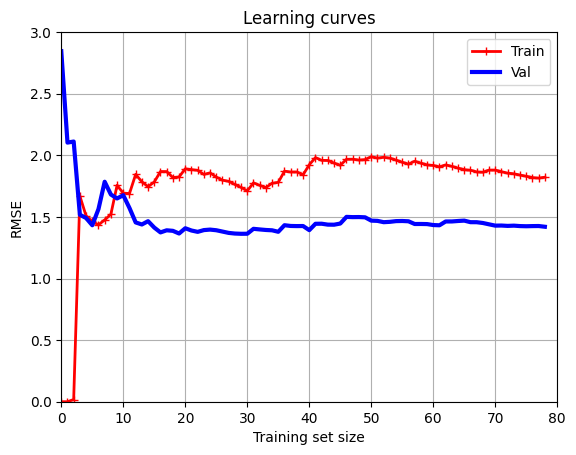

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning curves")
    plt.legend()
    plt.axis([0, 80, 0, 3])
    plt.grid(True)
    plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)



這張圖是「**學習曲線（Learning Curve）**」，用來觀察模型在**不同訓練資料量下的表現差異**，圖中顯示的是訓練集和驗證集的 RMSE（Root Mean Squared Error）誤差。

RMSE 是一種衡量預測誤差的指標，`越小表示預測越準確`，主要是計算預測值與實際值之間的差距，然後取平方根。


* **X 軸：Training set size**

  * 代表用了多少資料來訓練模型（從少到多）

* **Y 軸：RMSE**

  * 預測誤差（越小越好）

* **紅線（Train）**

  * 訓練資料的誤差

* **藍線（Val）**

  * 驗證資料（未參與訓練）上的誤差


#### 解讀這張圖：
前段（左邊）訓練資料很少時（<10 筆），**Train 誤差很低**，因為模型可以完全記住少量資料，但 **Val 誤差很高**，表示模型在新資料上表現不好 → **過擬合（Overfitting）**。

中段與後段（右邊）隨著訓練資料增加，**Train 誤差上升**（因為不能再記住每一筆資料了），同時 **Val 誤差下降**，代表模型泛化能力變好，最後兩條曲線趨於穩定，出現一個**穩定的誤差間距**（約 0.3 左右）。

<span style="color: skyblue;"> 泛化能力（Generalization ability）是指一個機器學習模型在「沒看過的新資料」上表現得有多好的能力。</span>

#### 總結判斷：

* 模型可能有**些微偏差（bias）與變異（variance）**，但整體是「穩定可用」的模型。
* 如果要再提升，可以考慮：

  * 用更強的模型（降低 bias）
  * 加入更多資料或正則化（降低 variance）


## 1.8 Bias/Variance Trade-off（偏差與變異的權衡）

### <span style="color: skyblue;"> 1.8.1 名詞解釋: 什麼是 Bias（偏差）？ </span>
* 偏差（Bias）是指模型預測值與真實值之間的差距，模型「看錯方向」的誤差。
* 如果模型太簡單（例如你用一條直線去擬合一個彎曲的資料），那你永遠都學不到真正的趨勢。
* **高偏差模型**常見特徵：

  * 預測不準
  * 訓練誤差高
  * 欠擬合（Underfitting）


### <span style="color: skyblue;"> 1.8.2 名詞解釋: 什麼是 Variance（變異）？

* 指的是模型太敏感於訓練資料的小變動。
* 如果模型太複雜（例如你用 10 次多項式去擬合只有 5 筆資料），那它可能把每個小變化都當作重要特徵記住，導致學到的東西沒辦法泛化。
* **高變異模型**常見特徵：

  * 訓練資料表現非常好
  * 驗證資料表現很差
  * 過擬合（Overfitting）


### <span style="color: skyblue;"> 1.8.3 名詞解釋: 什麼是 Irreducible Error（不可消除的誤差）？

* 是因為資料本身有雜訊、缺漏、錯誤所造成的誤差。
* 不管你用什麼模型都沒辦法完全消除，唯一方法是改善資料品質。

### <span style="color: skyblue;"> 1.8.4 名詞解釋: 為什麼叫做 Trade-off？

因為**模型複雜度↑ → 偏差↓，但變異↑**；反之亦然。

你沒辦法兩邊都拿到好處：

* 模型太簡單 → 高偏差、低變異
* 模型太複雜 → 低偏差、高變異

所以你要「在偏差與變異之間找到一個平衡點」，這就是所謂的 **Bias-Variance Trade-off**。


當你調整**多項式的階數**時，你其實就是在調整模型的複雜度：

| 階數 | 偏差 (Bias) | 變異 (Variance) | 模型情況 |
| -- | --------- | ------------- | ---- |
| 1  | 高         | 低             | 欠擬合  |
| 3  | 中         | 中             | 最佳平衡 |
| 10 | 低         | 高             | 過擬合  |

畫出學習曲線後，你就可以「視覺化」這個 trade-off，幫助你決定使用幾階的多項式最合適。



# 2. 含正規化的線性模型
正規化（Regularization）是用來防止模型過擬合的一種技術。它的基本思想是：在損失函數中加入一個懲罰項，這個懲罰項會隨著模型參數的增大而增大，從而限制模型的複雜度。這樣可以讓模型在訓練資料上表現得更好，但在驗證資料上表現得更差。正規化的主要目的是減少模型的變異性，提高模型的泛化能力。常見的正規化方法有 L1 正規化(Lasso Regression)和 L2 正規化(Ridge Regression)。

模型的自由度（degree of freedom）是指模型能夠學習的參數數量。自由度越高，模型就越複雜，能夠擬合的資料就越多，但同時也容易過擬合。正規化可以幫助我們控制模型的自由度，從而提高模型的泛化能力。

對於線性模型來說，正規化的做法是約束模型的權重。

## 2.1 Lasso 迴歸 (Lasso Regression) L1 正規化


### 2.1.1 損失函數：

$$
J(\boldsymbol{\theta}) = \text{MSE} + \lambda \sum_{j=1}^{n} |\theta_j|
$$

* 這裡的懲罰是對參數的「絕對值」。
* 不像平方，**對小的參數也施加壓力**。

#### 2.1.2 效果

* 很容易把某些參數`「直接壓成 0」`。
* 適合用來做**特徵選擇**：只保留重要變數，其餘剔除。

#### 2.1.3 幾何直覺

* 在參數空間中，L1 的懲罰項是一個菱形（在高維空間中是稜角明顯的多面體）。
* 最終解通常會「剛好落在邊界稜角上」，所以很多 $\theta_j$ 為 0。

#### 2.1.4 特性：

- 有能力把某些參數直接變成 0（變成稀疏模型）

- 等於是「自動幫你做特徵選擇」

你可以想像是在說「只留下對預測有用的參數，其他歸零」





## 2.2 山嶺迴歸 (Ridge Regression) L2 正規化

### 2.2.1 損失函數（包含懲罰項）：

$$
J(\boldsymbol{\theta}) = \text{MSE} + \lambda \sum_{j=1}^{n} \theta_j^2 = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 + \lambda \sum_{j=1}^{n} \theta_j^2
$$

* 其中 $\lambda$ 是正規化強度：越大代表對參數壓得越緊。
* $\theta_j^2$：平方項 → 對「大參數值」懲罰更嚴厲。

### 2.2.2 效果

* **會讓所有參數變小**，但通常**不會變成 0**。
* 讓模型整體變得平滑、穩定，不容易被單一特徵影響太大。

### 2.2.3 幾何直覺

* 在參數空間中，懲罰項的形狀是一個圓（或高維球體），讓參數的選擇「卡在圓內」。
* 最終解是：損失函數最小值與這個圓的交點。

### 2.2.4 特性：

- 會讓「大的參數」變小，但不會變成 0

- 參數會比較平均地縮小

你可以想像是在限制「參數整體不能太大」

## 2.3 L1 與 L2 正規化的比較

| 面向     | L1 正規化（Lasso）       | L2 正規化（Ridge）   |    
| ------ | ------------------- | --------------- |
| 懲罰形式   | (  $\theta_j$)（一階）                   |$\theta_j^2$（二階）     |  
| 懲罰效果   | 有機會讓參數變成 0（稀疏）      | 讓參數變小但不會為 0     |     
| 特徵選擇   | 可以做特徵選擇             | 無法做特徵選擇         |      
| 對離群值敏感 | 較敏感（因為對所有參數均等施壓）    | 較穩定（對大參數的懲罰更強）  |     
| 幾何形狀   | 菱形約束區域，容易在稜角產生 0 參數 | 球形約束區域，參數均勻壓縮   |       
| 適合場景   | 特徵很多但希望「自動挑掉不重要的」   | 特徵都可能有用，但怕模型太複雜 |   


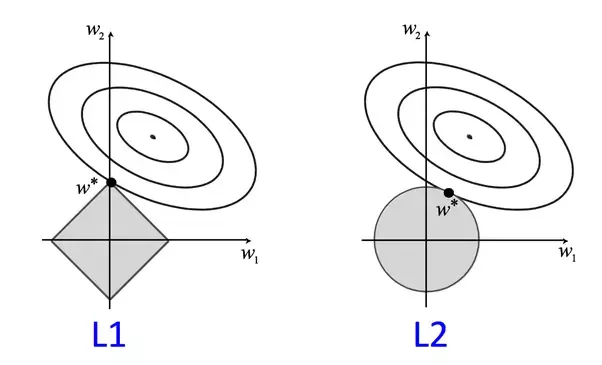

[參考資料](https://medium.com/intuition/understanding-l1-and-l2-regularization-with-analytical-and-probabilistic-views-8386285210fc)

## 2.4 Elastic Net（彈性網）

如果你希望同時保有：

* L1 的「稀疏性」能力
* L2 的「穩定性」與「數值計算友善性」

可以使用 Elastic Net：

$$
J(\boldsymbol{\theta}) = \text{MSE} + \lambda_1 \sum |\theta_j| + \lambda_2 \sum \theta_j^2
$$

它能在稀疏與穩定之間做出彈性權衡。


## 2.5 使用各種線性模型的時機點

| 模型名稱                      | 適合                                               | 不適合                               |
| ------------------------- | ------------------------------------------------------ | -------------------------------------- |
| **Linear Regression**     | - 特徵不多，資料量不大<br>- 特徵與目標呈線性關係明確<br>- 不需要特徵選擇            | - 特徵數量多或易過擬合<br>- 特徵之間有共線性（高度相關）       |
| **L2正規化**      | - 特徵多且彼此可能有關聯<br>- 所有特徵都可能有貢獻<br>- 想限制參數大小以防過擬合        | - 想要自動篩選特徵（Ridge 不會將參數壓成 0）            |
| **L1正規化**      | - 特徵非常多但只有少數重要<br>- 想進行特徵選擇<br>- 需要模型可解釋性              | - 所有特徵都可能重要<br>- 特徵之間強烈相關（可能隨機只保留其中一項） |
| **Elastic Net**           | - 特徵多但部分有用<br>- 特徵可能相關，需兼顧稀疏性與穩定性<br>- 無法單選 L1 或 L2 時  | - 問題結構簡單，使用純 L1 或 L2 即可                |
| **Polynomial Regression** | - 特徵與目標變數呈非線性關係<br>- 資料量中等可控制過擬合<br>- 需要彎曲模型解釋性        | - 高維特徵＋高次項，易造成維度爆炸<br>- 資料雜訊多時容易過擬合    |
| **SVD 解法**                | - 資料量小，可接受完整計算解析解<br>- $X^TX$ 不可逆或條件數差時<br>- 需要數學穩定性分析 | - 資料量大，計算與記憶體成本高<br>- 需支援即時或增量學習場景     |
| **SGD 解法**                | - 大型資料集<br>- 資料需分批載入<br>- 線上學習與快速收斂需求                  | - 小型資料集，closed-form 更快<br>- 對收斂精度有嚴格要求 |



## <span style="color: skyblue;"> 2.6 名詞解釋: 早期停止（Early Stopping）</span>
在這種迭代學習演算法正規化的情況下，我們可以驗證誤差到一定的最小值就立即停止訓練，這種作法稱為早期停止（Early Stopping）。

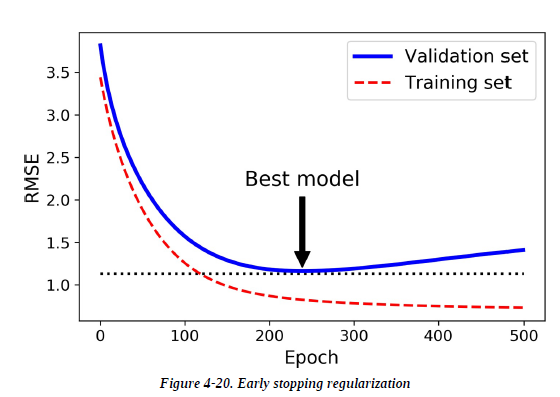

# 3. 羅吉斯迴歸（Logistic Regression）
羅吉斯回歸（Logistic Regression）雖然名字裡有「回歸」，但它其實是一種**分類模型**，主要用來預測某個事件是否發生（例如：會不會生病、會不會購買、圖像是不是狗）。

它的核心思想可以從線性回歸延伸理解，但多了**一個重要的轉換步驟**，讓預測結果限制在 $0 \sim 1$ 的範圍中。


## 3.1 羅吉斯迴歸 核心概念流程

### 3.1.1 **先算一個線性組合：**

$$
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n = \boldsymbol{\theta}^T \mathbf{x}
$$

   這和線性回歸一樣，算出的是一個實數值（可能是 -100、0、+50…）

### 3.1.2 **接著套上 sigmoid 函數（壓縮到 0\~1 之間）：**

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

sigmoid 函數會把任何實數轉成一個「機率」，例如：

* $z = 0$ → $\hat{y} = 0.5$
* $z = +10$ → $\hat{y} \approx 1$
* $z = -10$ → $\hat{y} \approx 0$

### 3.1.3 **最後將這個機率進行分類：**

 * 若 $\hat{y} \geq 0.5$，判斷為「正類別」（例如：會購買）
 * 若 $\hat{y} < 0.5$，判斷為「負類別」（例如：不會購買）


## 3.2 與線性回歸的差別

| 項目     | 線性回歸          | 羅吉斯回歸          |
| ------ | ------------- | -------------- |
| 輸出類型   | 連續數值（例如價格、分數） | 機率值（0 到 1）     |
| 適合任務   | 預測實數          | 預測二元分類（例如是或不是） |
| 最終函數形式 | 直接輸出          | 使用 sigmoid 做壓縮 |



## 3.3 訓練方式：最大化機率（最大概似）

羅吉斯回歸不使用 MSE（均方誤差）來當作代價函數，而是使用**對數損失函數（log loss）**：

$$
J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

這個函數會：

* 懲罰預測錯誤的機率越多
* 強迫模型讓正確類別的機率越接近 1，錯誤類別越接近 0







## 3.4 羅吉斯回歸數學運作
羅吉斯回歸的數學運作其實和線性回歸很像，只是多了一個「sigmoid 函數」的轉換步驟，讓預測結果限制在 0 到 1 的範圍內。

假設你想用年齡（age）來預測某人是否會買健身會員卡（1=會，0=不會）：

1. 你建立模型：$\hat{y} = \sigma(\theta_0 + \theta_1 \cdot \text{age})$
2. 假設某人 25 歲，模型算出來 $\hat{y} = 0.85$
3. 表示這個人有 85% 機率會買 → 分類為「會買」

### 3.4.1 機率估計公式

$$
\hat{p} = h_\theta(\mathbf{x}) = \sigma(\mathbf{x}^T \boldsymbol{\theta})
$$

這是羅吉斯回歸的預測公式，意思是：

1. 把輸入資料 $\mathbf{x}$ 和模型參數 $\boldsymbol{\theta}$ 做內積，得到一個數值 $z = \mathbf{x}^T \boldsymbol{\theta}$。
2. 把這個 $z$ 傳進 sigmoid 函數 $\sigma(z)$，輸出一個機率 $\hat{p}$，這個機率介於 0 到 1 之間，代表「屬於正類別」的可能性。


### <span style="color: skyblue;"> 3.4.2 名詞解釋: Sigmoid 函數 </span>

$$
\sigma(t) = \frac{1}{1 + \exp(-t)}
$$

這個函數會把任意的 $t$ 壓縮到區間 $(0, 1)$，呈現 **S 型曲線**：

* 當 $t \ll 0$ 時，$\sigma(t) \rightarrow 0$
* 當 $t = 0$ 時，$\sigma(t) = 0.5$
* 當 $t \gg 0$ 時，$\sigma(t) \rightarrow 1$

這就是為什麼羅吉斯回歸的輸出會是「機率」，而不是一個實數。

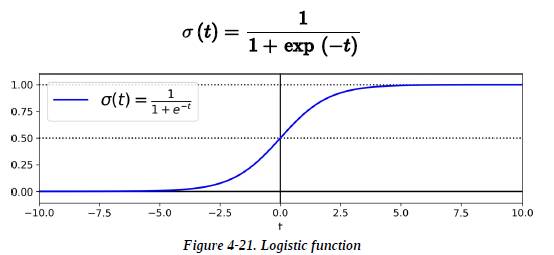

### 3.4.3 機率轉為類別預測

$$
\hat{y} =
\begin{cases}
0 & \text{if } \hat{p} < 0.5 \\
1 & \text{if } \hat{p} \geq 0.5
\end{cases}
$$

模型最後會根據預測機率 $\hat{p}$ 來決定預測結果是 0 還是 1，這叫做**閾值分類決策（threshold decision）**，預設閾值是 0.5，但在實務上你也可以根據應用需求調整它（例如想要更保守或更積極地預測為「1」）。


假設你有以下輸入資料：

* $\mathbf{x} = [1, \text{age}=30]$
* $\boldsymbol{\theta} = [-5, 0.2]$

1. 計算 $z = \mathbf{x}^T \boldsymbol{\theta} = -5 + 0.2 \times 30 = 1$
2. 套用 sigmoid：$\hat{p} = \sigma(1) \approx 0.731$
3. 因為 $\hat{p} > 0.5$，所以預測 $\hat{y} = 1$

這代表「這個人很可能會是正類別（例如會購買）」


## 3.5 羅吉斯回歸的訓練代價函數：交叉熵（Cross-Entropy）

由於羅吉斯回歸輸出的是機率（值在 0 到 1 之間），而不是連續值，所以不能用 MSE（均方誤差）作為損失函數，否則會導致收斂緩慢甚至錯誤方向。

我們使用的是**邏輯損失（Log Loss）或交叉熵損失（Cross-Entropy Loss）**：



#### 想像你在猜答案：

你有一個模型（像一個學生），他的任務是「猜答案」。
每一題都是「誰是正確類別」，可能有三種選項（貓、狗、鳥）。


### 3.5.1 cross entropy 在幹嘛？

> 它是在**評估模型的信心和準確度**有多接近正確答案。


一個理想的情況：

* 真實答案是「狗」
* 模型預測：貓 0.01，狗 **0.98**，鳥 0.01
  → 模型超級準！

一個很差的情況：

* 真實答案是「狗」
* 模型預測：貓 **0.6**，狗 **0.2**，鳥 **0.2**
  → 猜錯而且還很有自信！


#### Cross Entropy 的公式（簡化版）：

假設正確類別是第 $i$ 類，模型預測它的機率是 $p_i$，那：

$$
\text{Cross Entropy} = -\log(p_i)
$$

* 如果 $p_i$ 很接近 1（超有信心），cross entropy ≈ 0（好）
* 如果 $p_i$ 很小（猜錯），cross entropy → ∞（壞）


> **Cross Entropy 就是：你猜對了嗎？而且你猜得夠有信心嗎？如果你猜錯還很有自信，那就罰得更重。**

### 3.5.2 討厭的數學公式

$$
J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$$

其中：

* $m$：訓練樣本數量
* $y^{(i)}$：第 $i$ 筆樣本的真實標籤（0 或 1）
* $\hat{p}^{(i)} = h_\theta(\mathbf{x}^{(i)}) = \sigma(\mathbf{x}^{(i)T} \boldsymbol{\theta})$：模型對第 $i$ 筆的預測機率

#### 為什麼這個函數合理？

它讓：

* 當預測機率 $\hat{p} \rightarrow 1$ 且真實標籤為 1，則損失趨近於 0
* 當預測機率 $\hat{p} \rightarrow 0$ 且真實標籤為 1，損失趨近於無限大

也就是說，它會「懲罰錯誤的自信預測」，並鼓勵「準確而自信的預測」。


### <span style="color: skyblue;"> 3.5.3 名詞解釋: 決策邊界（Decision Boundary）</span>

**定義：**
決策邊界是指羅吉斯回歸模型把輸入空間切分為「預測為 1」和「預測為 0」的那條分界線。

因為羅吉斯回歸的決策規則是：

$$
\hat{y} = 
\begin{cases}
1 & \text{if } \sigma(\mathbf{x}^T \boldsymbol{\theta}) \geq 0.5 \\
0 & \text{if } \sigma(\mathbf{x}^T \boldsymbol{\theta}) < 0.5
\end{cases}
$$

這其實等價於：

$$
\mathbf{x}^T \boldsymbol{\theta} = 0
$$

#### 為什麼？

因為 $\sigma(z) = 0.5$ 的時候，$z = 0$。所以決策邊界其實就是所有讓 $\mathbf{x}^T \boldsymbol{\theta} = 0$ 的點所構成的集合。


#### 幾何直覺：

* **在 2D 空間（兩個變數）**：決策邊界是一條直線。
* **在 3D 空間（3 個變數）**：決策邊界是一個平面。
* **在高維空間**：決策邊界是一個超平面（hyperplane）。

這也是為什麼羅吉斯回歸只能處理**線性可分的分類問題**。


### 3.5.4 小結

| 概念   | 說明                                                         |
| ---- | ---------------------------------------------------------- |
| 代價函數 | 使用交叉熵（cross-entropy）來懲罰錯誤的機率預測                             |
| 損失作用 | 懲罰錯誤而自信的預測，加速收斂穩定                                          |
| 決策邊界 | 定義為 $\mathbf{x}^T \boldsymbol{\theta} = 0$，表示預測機率為 0.5 的邊界 |
| 幾何意義 | 在 2 維空間中是直線，在高維空間中是超平面                                     |




## 3.6 羅吉斯迴歸實作

接下來要使用iris(鳶尾花)資料集來進行羅吉斯迴歸的實作，這個資料集有 4 個特徵（sepal length, sepal width, petal length, petal width）和 3 個類別（setosa, versicolor, virginica）。我們將使用 scikit-learn 的 LogisticRegression 模型來進行訓練和預測。

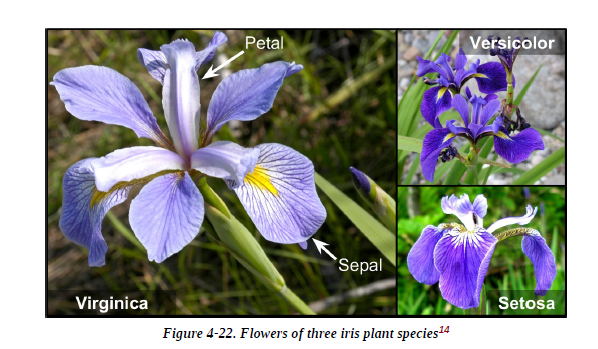

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [22]:
x = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if iris-virginica, else 0

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

我們來看一下模型估系花瓣寬度從0-3的花朵機率

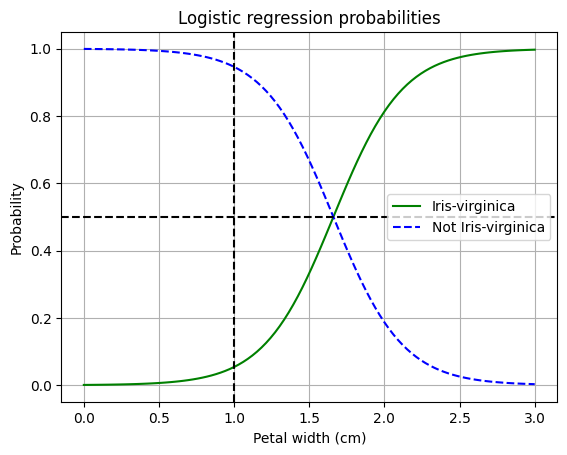

In [ ]:

x_new = np.linspace(0, 3, 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label="Iris-virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label="Not Iris-virginica")
plt.axhline(0.5, color="black", linestyle="--")
plt.axvline(1, color="black", linestyle="--")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.title("Logistic regression probabilities")
plt.legend()
plt.grid(True)
plt.show()

## 3.7 Softmax 迴歸 (Multinomial Logistic Regression) 多項式邏輯斯迴歸
Softmax 迴歸（Softmax Regression）是羅吉斯迴歸的延伸，用來處理多類別分類問題。它的核心思想是：對於每一個類別，計算一個機率，然後選擇機率最大的類別作為預測結果。

當Softmax 模型收到一個輸入 $\mathbf{x}$ 時，會計算每個類別 $k$ 的機率 $p_k$， 再對這些函數套用 Softmax 函數來估計每個類別的機率

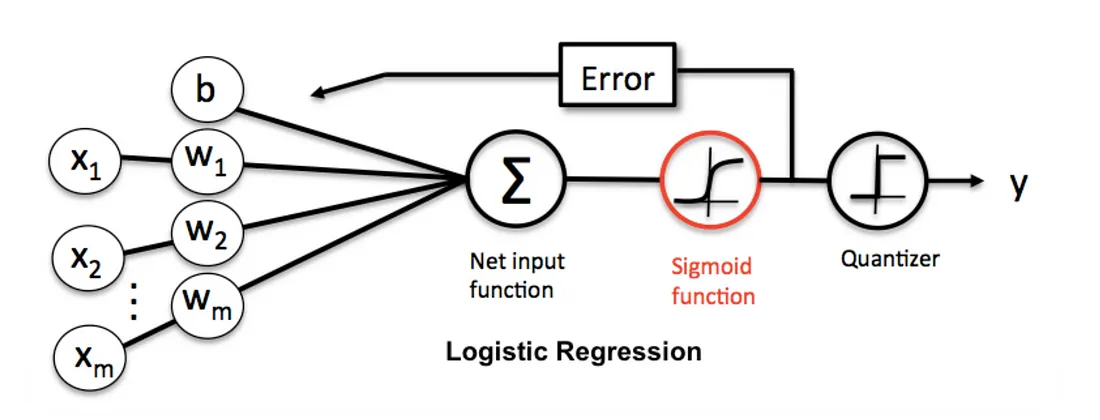

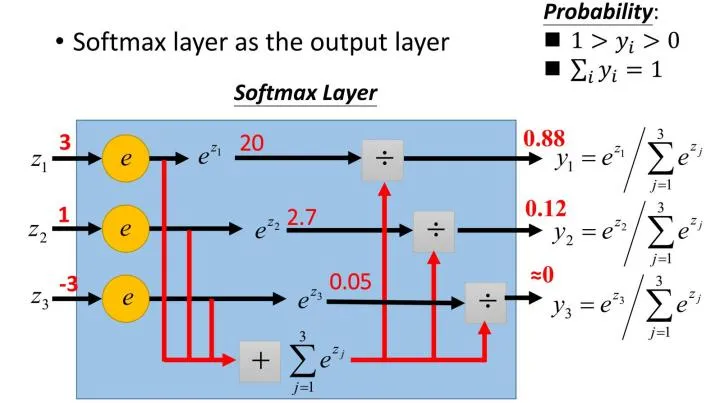

[參考資料](https://medium.com/%E6%89%8B%E5%AF%AB%E7%AD%86%E8%A8%98/%E4%BD%BF%E7%94%A8-tensorflow-%E5%AD%B8%E7%BF%92-softmax-%E5%9B%9E%E6%AD%B8-softmax-regression-41a12b619f04)

In [30]:
x = iris["data"][:,(2, 3)]  # petal length and width
y = iris

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=2)
softmax_reg.fit(x, y["target"])
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[5.18412203e-05, 1.55854934e-01, 8.44093225e-01]])

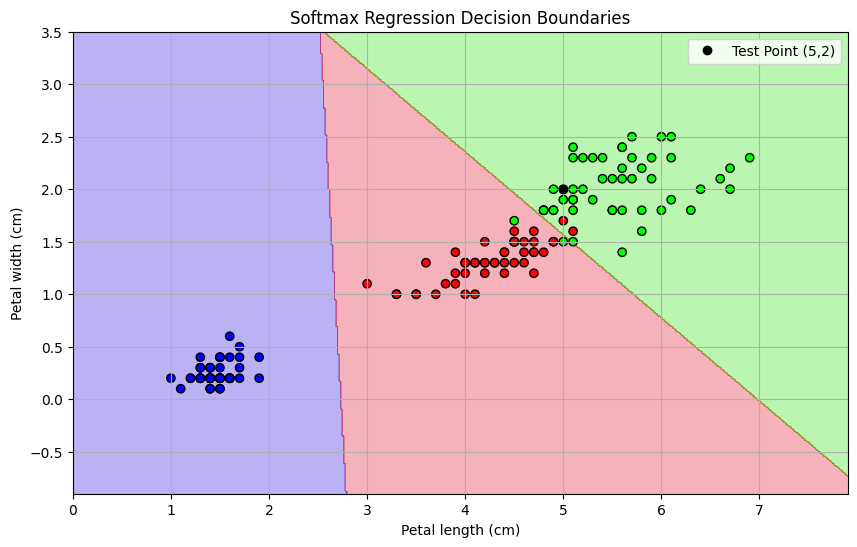

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# 讀取資料
iris = load_iris()
X = iris["data"][:, (2, 3)]  # 花瓣長度與寬度
y = iris["target"]  # 三類：0 = Setosa, 1 = Versicolor, 2 = Virginica

# 建立 softmax 邏輯回歸模型（多類別）
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=2)
softmax_reg.fit(X, y)

# 建立網格以顯示每一類的預測結果
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = softmax_reg.predict(X_new).reshape(x0.shape)

# 畫圖
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolors="k")
plt.plot(5, 2, "ko", label="Test Point (5,2)")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Softmax Regression Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()


### 3.7.1 Cross Entropy : 衡量預測機率與真實標籤的「距離」
交叉熵用來衡量「模型預測的機率分布」與「實際真實分布」之間的差異。

- 如果模型預測很接近真實標籤，交叉熵會很小。

- 如果模型預測錯得離譜，交叉熵會很大。

也就是說，交叉熵越小，模型預測越準。

### <span style="color: skyblue;"> 3.7.2 名詞解釋: KL 散度（Kullback-Leibler Divergence）</span>
KL散度（Kullback-Leibler Divergence）是一種衡量兩個機率分布之間差異的指標。它可以用來評估模型預測的機率分布與真實標籤的機率分布之間的差異。KL 散度越小，表示兩個分布越接近。
KL 散度的公式如下：
$$
D_{KL}(P || Q) = \sum_{i} P(i) \log\left(\frac{P(i)}{Q(i)}\right)$$

其中 $P$ 是真實分布，$Q$ 是預測分布。KL 散度是非對稱的，也就是說 $D_{KL}(P || Q) \neq D_{KL}(Q || P)$。這意味著從 $P$ 到 $Q$ 的距離不一定等於從 $Q$ 到 $P$ 的距離。

KL 散度的值總是非負的，當且僅當 $P$ 和 $Q$ 完全相同時，KL 散度為 0。這意味著 KL 散度可以用來衡量模型預測的機率分布與真實標籤的機率分布之間的差異。

KL 散度越小，表示兩個分布越接近。這使得 KL 散度成為一個有用的指標，用於評估模型的預測性能。




# 4. 支援向量機（Support Vector Machine, SVM）
支援向量機（SVM）是一種監督式學習演算法，主要用於分類和迴歸分析，在高維空間中尋找一個超平面，將不同類別的資料點分開，使得這個超平面與最近的資料點之間的距離最大化。這些最近的資料點稱為「支援向量」，它們對決策邊界的形成起著關鍵作用。

[參考資料](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b)

## 4.1 線性 SVM 分類
線性 SVM 分類是指當資料可以用一條直線（或超平面）來分開時，SVM 將尋找一個最佳的超平面，使得這個超平面與最近的資料點之間的距離最大化。這樣的做法使得 SVM 可以處理線性可分的問題。線性 SVM 的目標是最大化邊界（margin），即最小化支援向量到超平面的距離。

* **特徵空間**中資料點是**線性可分的**。
* 尋找一條**直線（2D）/ 超平面（多維）**，使兩類資料點之間的間隔（margin）最大。
* 分類邊界是：

  $$
  \mathbf{w} \cdot \mathbf{x} + b = 0
  $$

    其中 $\mathbf{w}$ 是法向量，$b$ 是偏差項。
    分類邊界是模型「決策點」，判定資料屬於哪一類的分界線或面。

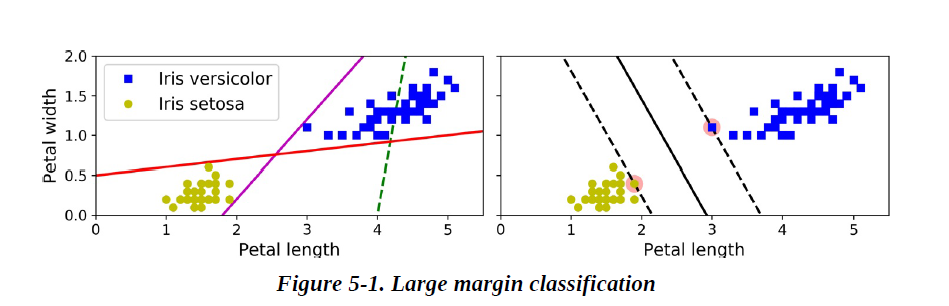

### <span style="color: skyblue;"> 4.1.1 名詞解釋: 支援向量（Support Vector）</span>
支援向量是指距離分類邊界最近的資料點。這些資料點對於決策邊界的形成起著關鍵作用，因為它們決定了邊界的位置和方向。支援向量是 SVM 模型中最重要的資料點，因為它們對模型的影響最大。
>支援向量是「離分類邊界最近的點」，它們決定了 SVM 的分類線（或超平面）該怎麼畫。

支援向量的數量越少，模型的泛化能力越強。

支援向量的數量越多，模型的泛化能力越弱。


## 4.2 SVM 的邊界（Margin）
SVM 的邊界是指將資料點分為兩類的超平面，這個超平面是由支援向量決定的。SVM 的目標是最大化這個邊界，使得兩類資料點之間的距離最大化。
### 4.2.1 硬邊距（Hard Margin）

#### 定義

* 不容許任何分類錯誤。
* 所有資料點都必須完全被正確分類，且不能落在分類邊界內部。
* 適用於資料完全線性可分的情況。

#### 數學條件

對所有資料點 $(x_i, y_i)$，滿足：

$$
y_i (\mathbf{w} \cdot x_i + b) \geq 1
$$

#### 缺點

* 對離群點或雜訊非常敏感。
* 在真實世界資料中通常無法使用。
```
分類邊界（直線）
        |
        |     ●   ●   ●
        |-----------------
        | ○   ○   ○
        |
（所有點都不准穿越邊界）
```
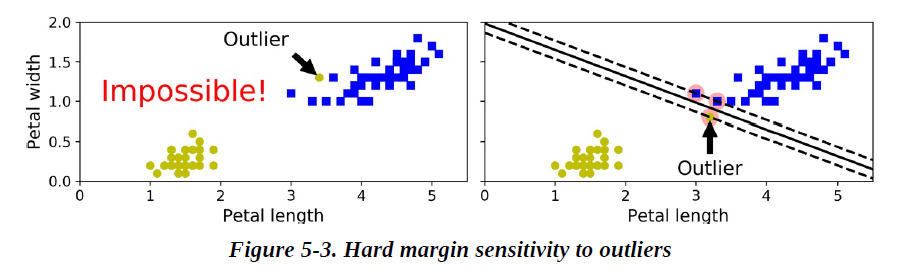

### 4.2.2 軟邊距（Soft Margin）

####  定義

* 容許部分分類錯誤，透過 slack variables（鬆弛變數）引入容錯空間。
* 更符合實際應用，能處理非線性可分或有雜訊的資料。

#### 數學條件

允許部分資料點違反分類條件：

$$
y_i (\mathbf{w} \cdot x_i + b) \geq 1 - \xi_i,\quad \xi_i \geq 0
$$

最小化目標函數：

$$
\frac{1}{2} \|\mathbf{w}\|^2 + C \sum \xi_i
$$

####  優點

* 更具有泛化能力。
* 可以在有重疊、雜訊的資料中正常工作。

```
分類邊界（直線）
        |
        |     ●   ●
        |-----------------
        | ○   ○       ● ← 容許錯分
        |
（部分點可以穿越邊界或被錯分）
```

###  4.2.3 參數 C 的作用（針對軟邊距）

* C 是懲罰係數，用來控制分類錯誤的容忍度。
* C 越大，模型越不容許分類錯誤，分類邊界趨近於硬邊距。
* C 越小，模型越容許錯誤，分類邊界會更寬鬆。

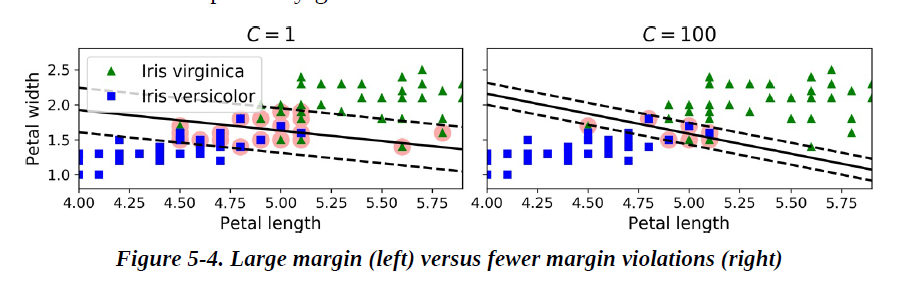




## 4.3 線性 SVM 分類實作

我們來載入iris資料集後，調整特徵尺度，接著訓練線性SVM模型來偵測 Iris Virginica 花朵

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length and width
y = (iris["target"] == 2).astype(np.float64)  # 1 if iris-virginica, else 0

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
#預測
svm_clf.predict([[5.5, 1.7]])

array([1.])



### <span style="color: skyblue;"> 4.3.1 名詞解釋: Hinge Loss</span>

**hinge loss** 是為了訓練分類器（特別是 SVM）設計的損失函數，用來懲罰分類錯誤或分類信心不足的情況。

對於一筆資料 $(x_i, y_i)$，其中 $y_i \in \{-1, +1\}$，預測值為 $f(x_i) = \mathbf{w} \cdot x_i + b$，則：

$$
\text{hinge loss} = \max(0,\ 1 - y_i f(x_i))
$$


* 如果分類器預測正確且 **信心夠高**（例如 $y_i f(x_i) \geq 1$），則損失為 0。
* 如果分類錯誤或預測信心不足（例如靠近邊界或分錯邊），就會產生正的損失，並被優化器懲罰。


| 真實標籤 $y_i$ | 預測值 $f(x_i)$ | $y_i \cdot f(x_i)$ | hinge loss = $\max(0, 1 - y_i f(x_i))$ |
| ---------- | ------------ | ------------------ | -------------------------------------- |
| +1         | +2.0         | +2.0               | 0                                      |
| +1         | +0.5         | +0.5               | 0.5                                    |
| +1         | -1.0         | -1.0               | 2.0                                    |



### 4.3.2 為何 SVM 要用 hinge loss？

* 它強調「**最大間距分類**」的概念。
* 不只是分類正確，還希望資料點「**離分類邊界夠遠**」。
* 損失函數對靠近邊界或分錯類的點進行懲罰，讓模型偏好更穩健的決策邊界。


```python
LinearSVC(C=1.0, loss="hinge")
```

* 使用 hinge loss。
* 搭配 `C`（正則化參數）來平衡間距最大化與錯誤懲罰。



雖然線性SVM分類器的效果很好，但很多資料很難做線性分隔。

加入更多特徵是處理非線性資料組的做法，有時候可以產生可線性分隔的資料組。

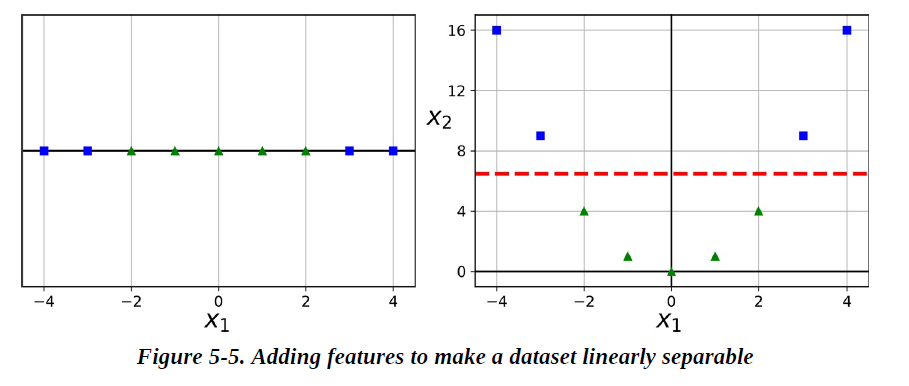


## 4.4 非線性 SVM 分類
非線性 SVM 分類是指當資料無法用一條直線（或超平面）來分開時，使用核函數（Kernel Function）將資料映射到高維空間，使得在高維空間中可以找到一個超平面來分開資料。這樣的做法使得 SVM 可以處理非線性可分的問題。常見的核函數有多項式Kernel（Polynomial Kernel）、高斯 RBF Kernel（Radial Basis Function, RBF）等。

* 資料點在原始空間中**不是線性可分的**。
* 使用**Kernel 技術（核函數）**將資料映射到高維空間，在那裡**可能是線性可分的**。





### <span style="color: skyblue;"> 4.4.1 名詞解釋: 核函數（Kernel Function）</span>
**核函數（Kernel Function）** 是 Support Vector Machine（SVM）等模型中用來**計算兩個資料點在高維空間中內積**的工具，**不需要實際把資料轉換到高維空間**，這就是所謂的 **核技巧（Kernel Trick）**。

有些資料在原本的特徵空間裡是**線性不可分的**：

```
原始空間：
○ ○ ● ● ○ ● ○ ●

很難找到一條直線分開兩類
```

如果我們能將資料**映射（transform）到高維空間**，可能就可以線性分開：

```
高維空間（例如加了平方項）：
     ●       ○
  ●     ○
      ○      ●

可以用平面或超平面分開
```

但這樣做計算成本很高，核函數的目的就是\*\*「不用真的轉換，但能算出轉換後的內積」\*\*。


#### <span style="color: skyblue;"> 4.4.2 名詞解釋: 核技巧（Kernel Trick）</span>
核技巧是指在不需要實際計算高維空間的特徵向量的情況下，通過核函數來計算資料點之間的內積。這樣可以避免高維空間的計算成本，並且能夠有效地處理非線性問題。

假設有一個非線性映射函數：

$$
\phi: \mathbb{R}^n \rightarrow \mathbb{R}^m
$$

核函數的核心思想是：

$$
K(x, x') = \langle \phi(x), \phi(x') \rangle
$$

也就是說：**用 K(x, x') 直接表示高維空間中兩個點的內積，避免實際轉換 $\phi(x)$**。

#### 常見的核函數種類

| 核函數名稱       | 數學表示式                                     | 特點             |
| ----------- | ----------------------------------------- | -------------- |
| 線性核（Linear） | $K(x, x') = x \cdot x'$                   | 等同於不做任何轉換      |
| 多項式核        | $K(x, x') = (x \cdot x' + c)^d$           | 可以加入高次交互項      |
| RBF / 高斯核   | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$   | 可處理高度非線性資料，常用  |
| Sigmoid 核   | $K(x, x') = \tanh(\alpha x \cdot x' + c)$ | 模擬神經元激活函數（較少用） |




### 4.4.3 多項式 Kernel 
多項式特徵容易添加，也可以跟很多的機器學習演算法搭配，但在多項式次數很低的時候，無法處理很複雜的資料。而多項式次數越高，計算的複雜度跟時間也會隨之增加。

因此使用SVM時，可以採用‵kernel trick‵的技術，讓你時既不用加入許多多項式特徵，就可以一樣的效果
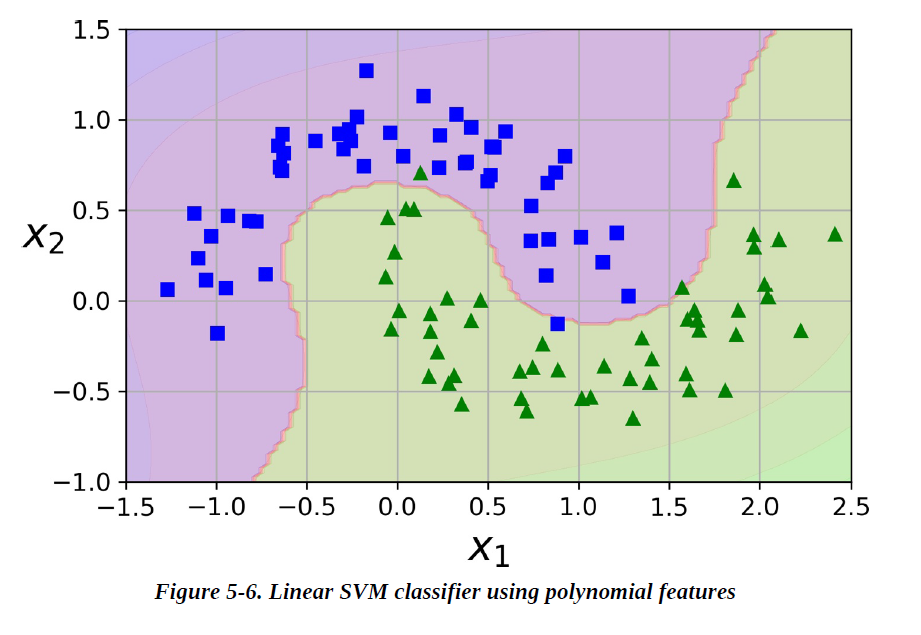

In [4]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])

poly_kernel_svm_clf.fit(X, y)



Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

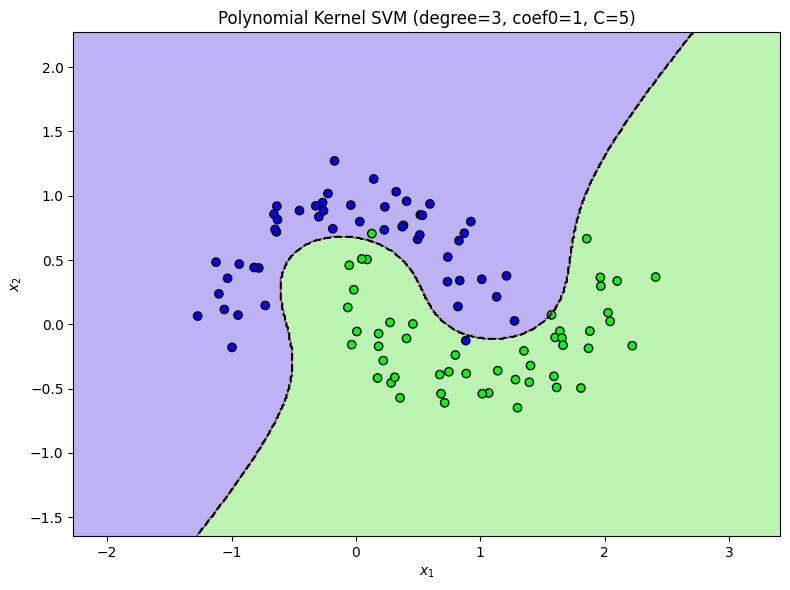

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 建立非線性資料集 (如圖形所示)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# 建立 Polynomial kernel SVM
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

# 繪製分類邊界
def plot_decision_boundary(clf, X, y, ax):
    x0s = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)
    x1s = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = clf.predict(X_new).reshape(x0.shape)
    
    ax.contourf(x0, x1, y_predict, alpha=0.3, cmap=plt.cm.brg)
    ax.contour(x0, x1, y_predict, levels=[0.5], colors="k", linestyles="--")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolors='k')

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(poly_kernel_svm_clf, X, y, ax)
ax.set_title("Polynomial Kernel SVM (degree=3, coef0=1, C=5)")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.tight_layout()
plt.show()


- degree=3：三次多項式核，表示決策邊界最多可以是三次曲線

- coef0=1：多項式核的偏移項，會影響高次項的重要性

- C=5：錯誤懲罰係數，控制模型對分類錯誤的容忍度

### 4.4.4 高斯 RBF Kernel 
另一個處理非線性問題的技術就是加入相似度函數（similarity function），這個函數會計算兩個資料點之間的距離，然後將這個距離轉換成一個相似度值。RBF Kernel 是最常用的相似度函數之一，它的公式如下：
$$  

K(x, x') = \exp(-\gamma \|x - x'\|^2)
$$

其中 $\gamma$ 是一個超參數，用來控制高斯函數的寬度。當 $\gamma$ 越大時，RBF Kernel 的影響範圍越小，模型越容易過擬合；當 $\gamma$ 越小時，RBF Kernel 的影響範圍越大，模型越容易欠擬合。


In [ ]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)),
])
rbf_kernel_svm_clf.fit(X, y)

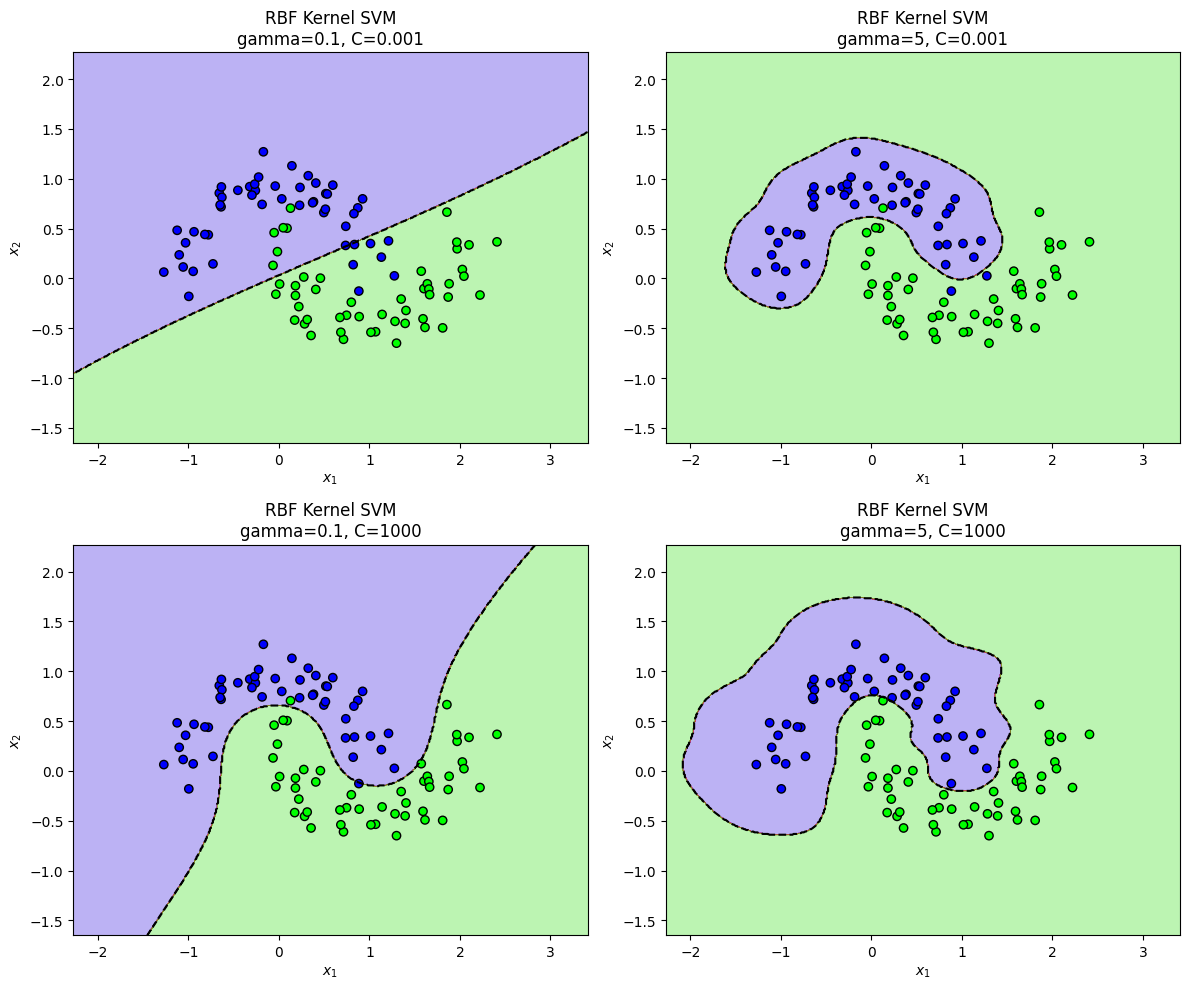

In [6]:
# 定義不同參數組合
param_grid = [
    {"gamma": 0.1, "C": 0.001},
    {"gamma": 5, "C": 0.001},
    {"gamma": 0.1, "C": 1000},
    {"gamma": 5, "C": 1000}
]

# 建立子圖畫布
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# 為每組參數建立模型並畫圖
for i, params in enumerate(param_grid):
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=params["gamma"], C=params["C"]))
    ])
    model.fit(X, y)
    plot_decision_boundary(model, X, y, axes[i])
    axes[i].set_title(f"RBF Kernel SVM\ngamma={params['gamma']}, C={params['C']}")
    axes[i].set_xlabel("$x_1$")
    axes[i].set_ylabel("$x_2$")

plt.tight_layout()
plt.show()


- $\gamma$：控制每個資料點影響範圍（越大表示影響範圍越小，模型越彎曲）

- C：控制容錯程度（越大越不容許錯誤，分類邊界更貼近資料）

#### 如何選擇這麼多Kernel?

選擇 Kernel 的方法通常是透過交叉驗證（cross-validation）來評估不同 Kernel 的性能，然後選擇表現最好的那一個。這樣可以確保模型在未來的資料上也能有良好的預測能力。

# 5. 決策樹 (Decision Tree)
決策樹跟SVM一樣，都是用途很廣泛的機器學習演算法，可以執行回歸、分類或式多輸出任務。

我們先用一個假設情境來說明決策樹的概念：

##  5.1 問題情境：你要不要帶傘？

你每天出門前都會想：「今天要不要帶傘？」
這就是一個**分類問題**，要決定是「帶傘」還是「不帶傘」這兩類。

你會根據幾個條件來判斷，例如：

1. **天氣預報有沒有說會下雨？**
2. **降雨機率是多少？**
3. **現在天空有沒有烏雲？**

這些條件就像是資料的「特徵（feature）」。

#### 用決策樹處理這個問題

決策樹會把這些條件變成一棵「判斷的樹」，流程如下：

```
           [天氣預報有下雨嗎？]
                /        \
             是           否
            /               \
  [降雨機率 > 50% ?]     [天空有烏雲？]
        /     \              /     \
     是        否         是        否
   帶傘       不帶傘     帶傘     不帶傘
```


## 5.2 對照概念說明

| 決策樹元素       | 現實意義                 |
| ----------- | -------------------- |
| 節點（node）    | 每一個問題（例：天氣預報？降雨機率？）  |
| 分支（branch）  | 每個判斷的結果（是/否）會導向不同分支  |
| 葉節點（leaf）   | 最終決策（例：帶傘或不帶傘）       |
| 特徵（feature） | 用來判斷的條件（例：降雨機率、天空樣子） |
| 標籤（label）   | 想要預測的結果（例：帶傘、不帶傘）    |

#### 決策樹怎麼做出來的？

當電腦訓練一棵決策樹時，它會從很多資料中學習：

* 例如：100 筆你過去有沒有帶傘的記錄
* 每筆資料都包含：天氣預報、降雨機率、天空情況、你有沒有帶傘
* 決策樹會找出：「**哪個問題先問，可以最好地把資料分開？**」
* 然後一步一步建成一棵「分類用的樹」


#### 延伸：這跟程式怎麼運算有關

在程式裡，決策樹用像這樣的邏輯來做預測：

```python
if 天氣預報 == "會下雨":
    if 降雨機率 > 0.5:
        return "帶傘"
    else:
        return "不帶傘"
else:
    if 烏雲 == True:
        return "帶傘"
    else:
        return "不帶傘"
```


### 小結

> 決策樹是一種讓電腦學會「根據條件一步步做選擇」的模型，像人在做判斷時一樣，一題一題問下去，最後做出決定。

常見的演算法有：ID3、C4.5、CART（Classification and Regression Trees）等。

## 5.3 決策樹如何生成?

決策樹在做分類時，就像是在不斷地「問問題」。每一層樹都會選出一個最能**幫助我們把資料分得清楚的問題**，這個過程是一步一步做決定的，這種方式叫做「貪婪法則」（意思是：每次都選目前看起來最好的選項）。


#### 舉個例子來說：

你要用電腦幫忙決定「明天比賽要不要舉行」，你有兩個可以參考的條件：**溫度** 和 **天氣**，你也有 5 筆以前的紀錄：

* 其中有 2 次比賽有舉行（正常）
* 有 3 次比賽沒舉行（取消）

現在決策樹要選擇第一個要問的問題（例如「溫度高嗎？」還是「天氣晴朗嗎？」）

這時候電腦會去看這兩個條件哪一個「能把有舉行 vs 沒舉行分得最清楚」
→ 發現如果用「天氣」來分，剛好可以把舉行和取消的記錄**完全分開**，那太棒了！

所以它就選「天氣」當第一個問題。這樣分下去，下面的資料就更好處理。

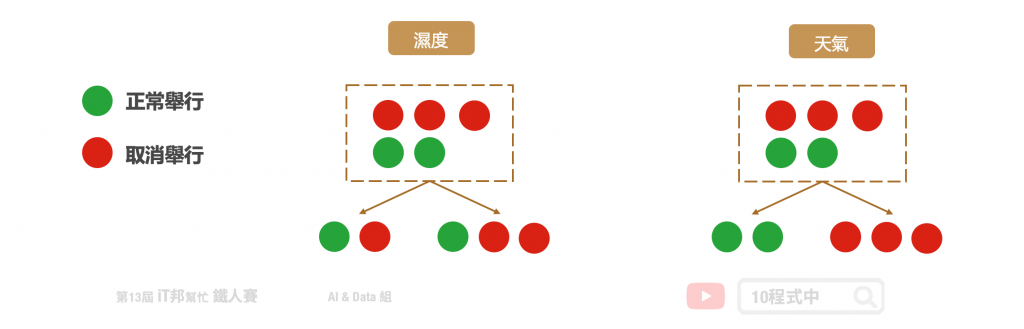

[參考資料](https://ithelp.ithome.com.tw/articles/10271143?sc=hot)



為了判斷「這樣分好不好」，電腦會用一種叫做「亂度」或「不純度」的指標來幫忙看「分完後是不是乾淨、分類是不是清楚」。


你也可以把決策樹想成一個「會挑問題的人」，它每次都挑一個**現在看起來最有效果的問題**來問，直到能分出答案為止。這就是決策樹的「貪婪」原則。



---


## 5.4 決策樹 實作


我們實際建立一個模型看一下決策樹的運作方式，這個模型會使用 scikit-learn 的 DecisionTreeClassifier 來進行訓練和預測。


[參考資料](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)


In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris["data"][:, 2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

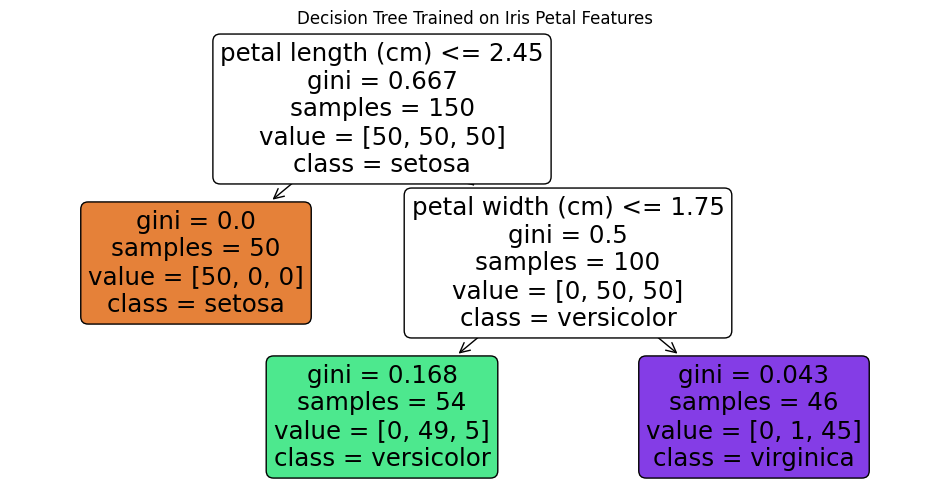

In [13]:
# 重新執行必要步驟，由於狀態已重置
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 載入資料與訓練模型
iris = load_iris()
X = iris["data"][:, 2:]  # 只使用花瓣長度與寬度
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# 繪製決策樹
plt.figure(figsize=(12, 6))
plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],      # Petal length, Petal width
    class_names=list(iris.target_names),       # 轉為 list 解決錯誤
    filled=True,
    rounded=True
)
plt.title("Decision Tree Trained on Iris Petal Features")
plt.show()




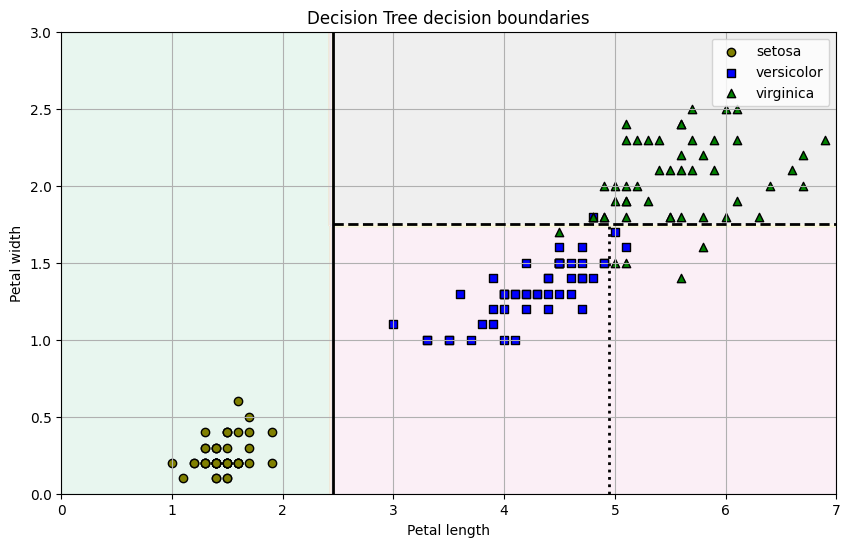

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 載入資料
iris = load_iris()
X = iris.data[:, 2:]  # 使用 petal length 和 width
y = iris.target

# 訓練深度限制為 2 的決策樹
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# 建立格點座標用來畫決策邊界
x0s = np.linspace(0, 7, 100)
x1s = np.linspace(0, 3, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x0.shape)

# 畫圖
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.Pastel2)

# 畫出分隔線
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)        # 第一層節點（Depth=0）
plt.plot([2.45, 7], [1.75, 1.75], "k--", linewidth=2)    # 第二層節點（Depth=1）
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)     # 第三層節點（Depth=2）

# 畫出資料點
for i, marker, color in zip([0, 1, 2], ["o", "s", "^"], ["olive", "blue", "green"]):
    plt.scatter(X[y == i, 0], X[y == i, 1], marker=marker, color=color, edgecolor="k", label=iris.target_names[i])

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.title("Decision Tree decision boundaries")
plt.grid(True)
plt.show()




#### 如何解讀這張圖：

* **顏色區塊**：是模型用來分類的「決策區域」，每一區塊代表決策樹預測出的類別。
* **分隔線**：代表決策樹的節點，也就是模型「在這裡做出某個判斷」。

  * 實線（垂直於 X 軸）是第一層（Depth = 0）：根據花瓣長度是否小於 2.45。
  * 虛線（水平於 X 軸）是第二層（Depth = 1）：根據花瓣寬度是否小於 1.75。
  * 點線（垂直）是第三層（Depth = 2）：再用花瓣長度 4.95 分出 virginica。


#### 資料點標記：

* **黃色圓點（○）**：Setosa → 花瓣最短、最窄
* **藍色方塊（□）**：Versicolor → 中間類型
* **綠色三角形（△）**：Virginica → 花瓣最長、最寬



## 5.5 決定如何分裂資料的依據
要選哪一個特徵來當節點的切分依據？
### 5.5.1 Gini Index（Gini 不純度）＝ Gini Impurity
Gini 指的是「資料的不純度」：
如果一個節點內的資料**全部都是同一類**，那它的 Gini = 0（最純）；
如果**類別混在一起**，Gini 就會上升。


對於 $k$ 類別，機率為 $p_i$：

$$
\text{Gini} = 1 - \sum_{i=1}^{k} p_i^2
$$


* 假設這個節點中有 100 筆資料：

  * 90 筆是 A 類，10 筆是 B 類：

    $$
    \text{Gini} = 1 - (0.9^2 + 0.1^2) = 1 - (0.81 + 0.01) = 0.18
    $$
  * 50 筆是 A 類，50 筆是 B 類：

    $$
    \text{Gini} = 1 - (0.5^2 + 0.5^2) = 0.5
    $$

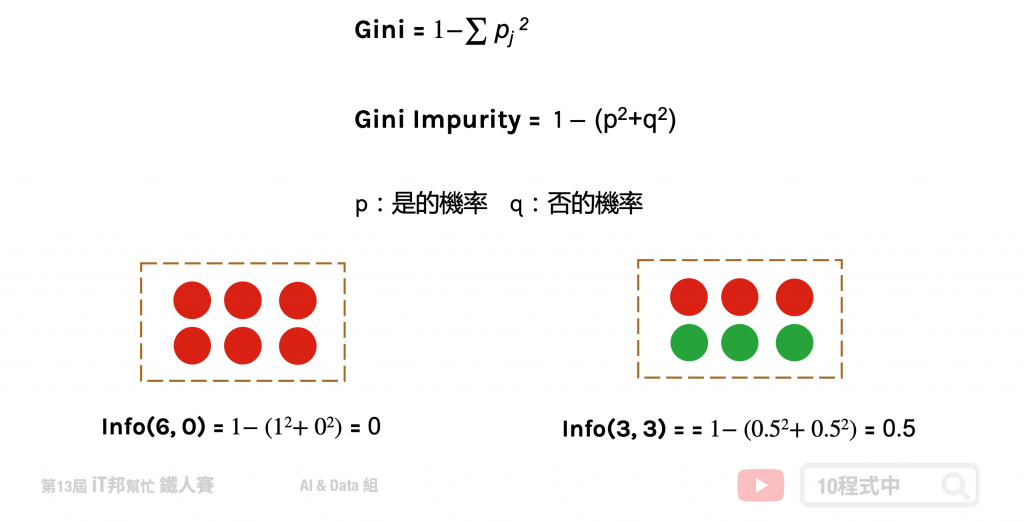

#### 用在哪？

CART 決策樹（Classification and Regression Tree）主要使用 Gini index 作為節點分裂依據。


### 5.5.2 Information Gain（資訊增益）

用「熵（entropy）」來衡量純度，衡量某個特徵切分後**讓資料更純的程度**。 Information Gain 透過從訓練資料找出規則，讓每一個決策能夠使訊息增益最大化。其算法主要是計算熵，因此經由決策樹分割後的資訊量要越小越好。

#### 熵的公式（以二分類為例）：

$$
\text{Entropy}(p) = -p \log_2 p - (1 - p) \log_2(1 - p)
$$

#### 資訊增益公式：

$$
\text{Information Gain} = \text{Entropy}_{原本的資料} - \sum (\text{子節點佔比} \times \text{子節點的 entropy})
$$

#### 缺點：

偏好**分支多的特徵**（例如身分證字號），會導致過度分裂（overfitting）。


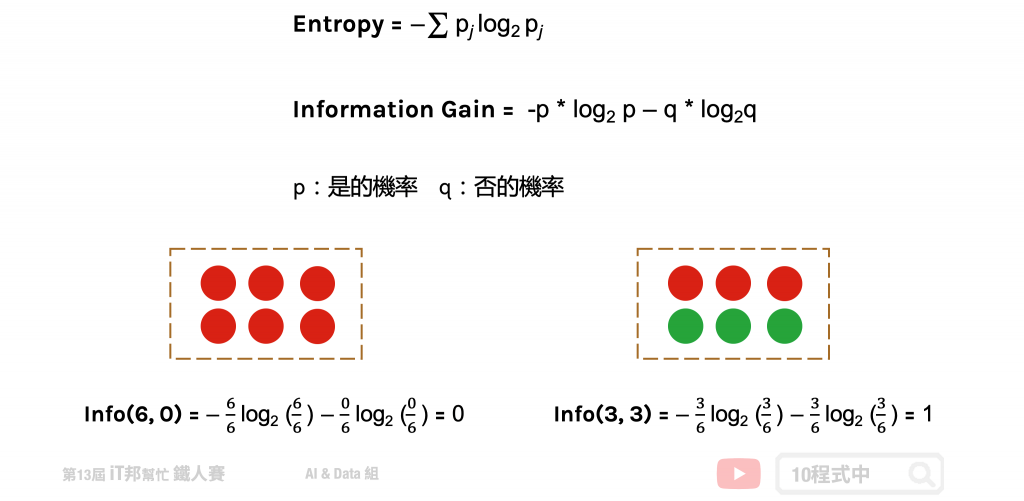


### 5.5.3 Gain Ratio（增益比）

為了解決「資訊增益偏好分支多」的問題，**Gain Ratio = 資訊增益 ÷ 分裂資訊**。

$$
\text{Gain Ratio} = \frac{\text{Information Gain}}{\text{Split Info}}
$$

其中 Split Info 是一種懲罰項，用來壓抑「分支太多」的特徵。

#### 用在哪？

ID3 決策樹用 Information Gain，C4.5 決策樹用 Gain Ratio。


## 5.6 Gini、Information Gain、Gain Ratio 的比較

| 指標名稱             | 測量什麼？   | 優點                       | 缺點             | 常用於演算法           |
| ---------------- | ------- | ------------------------ | -------------- | ---------------- |
| Gini Impurity    | 類別混合度   | 計算速度快、直觀                 | 和 entropy 結果相近 | CART (如 sklearn) |
| Information Gain | 資料熵下降程度 | 簡單、直觀                    | 偏好分裂數多的特徵      | ID3              |
| Gain Ratio       | 修正後的 IG | 解決 Information Gain 偏誤問題 | 可能對樣本不均敏感      | C4.5             |


### 小結

> Gini 是用來衡量「有多不乾淨」；Information Gain 是用來看「資料變得有多乾淨」；Gain Ratio 是為了讓「資訊增益不要太偏心」。

